# Credit Score Prdiction

### Importing the libraries

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
# ! pip install seaborn
import seaborn as sns

from sklearn.model_selection import train_test_split


### Load the dataset 

In [3]:
df_train = pd.read_csv('CreditScore_train.csv')
df_test = pd.read_csv('CreditScore_test.csv')

In [4]:
df_merged = pd.concat([df_train,df_test])

### Data Preprocessing 

In [5]:
df_merged.head()

,x001,x002,x003,x004,x005,x006,x007,x008,x009,x010,...,x296,x297,x298,x299,x300,x301,x302,x303,x304,y
0,1084094,426.0,39.0,128.0,426.0,0,0,0,0,0,...,0,NaN,0,0,0,0,NaN,0,NaN,807
1,1287777,160.0,2.0,64.0,160.0,1,1,2,0,1,...,17318,0.8417,1,1,1,0,NaN,0,NaN,819
2,1483016,163.0,16.0,104.0,239.0,0,0,0,1,0,...,0,NaN,0,0,0,0,NaN,0,NaN,803
3,959054,NaN,NaN,NaN,102.0,0,0,0,0,0,...,0,NaN,1,1,1,0,NaN,0,NaN,530
4,1342113,3.0,2.0,2.0,62.0,0,2,2,0,0,...,17413,1.0180,1,1,1,0,NaN,0,NaN,485


In [6]:
print(f" Shape of merged Data Set: {df_merged.shape}")

 Shape of merged Data Set: (100000, 305)


In [7]:
print(f"LIst of all columns: {list(df_merged.columns)}")

LIst of all columns: ['x001', 'x002', 'x003', 'x004', 'x005', 'x006', 'x007', 'x008', 'x009', 'x010', 'x011', 'x012', 'x013', 'x014', 'x015', 'x016', 'x017', 'x018', 'x019', 'x020', 'x021', 'x022', 'x023', 'x024', 'x025', 'x026', 'x027', 'x028', 'x029', 'x030', 'x031', 'x032', 'x033', 'x034', 'x035', 'x036', 'x037', 'x038', 'x039', 'x040', 'x041', 'x042', 'x043', 'x044', 'x045', 'x046', 'x047', 'x048', 'x049', 'x050', 'x051', 'x052', 'x053', 'x054', 'x055', 'x056', 'x057', 'x058', 'x059', 'x060', 'x061', 'x062', 'x063', 'x064', 'x065', 'x066', 'x067', 'x068', 'x069', 'x070', 'x071', 'x072', 'x073', 'x074', 'x075', 'x076', 'x077', 'x078', 'x079', 'x080', 'x081', 'x082', 'x083', 'x084', 'x085', 'x086', 'x087', 'x088', 'x089', 'x090', 'x091', 'x092', 'x093', 'x094', 'x095', 'x096', 'x097', 'x098', 'x099', 'x100', 'x101', 'x102', 'x103', 'x104', 'x105', 'x106', 'x107', 'x108', 'x109', 'x110', 'x111', 'x112', 'x113', 'x114', 'x115', 'x116', 'x117', 'x118', 'x119', 'x120', 'x121', 'x122', 'x

It has total 305 columns with 304 input variable (Independent variables) and one 'y' dependent variable

In [8]:
df_merged.isnull().any()

x001    False
x002     True
x003     True
x004     True
x005     True
        ...  
x301    False
x302     True
x303    False
x304     True
y       False
Length: 305, dtype: bool

In [9]:
df_merged.isna().sum()

x001        0
x002    21432
x003    21432
x004    21424
x005     6110
        ...  
x301        0
x302    73069
x303        0
x304    81875
y           0
Length: 305, dtype: int64

In [10]:
df_merged.describe(include='all').T

,count,mean,std,min,25%,50%,75%,max
x001,100000.0,1.218244e+06,272897.724977,517.0,974363.5000,1.235926e+06,1.445326e+06,1.677197e+06
x002,78568.0,1.257117e+02,115.785117,0.0,32.0000,1.000000e+02,1.800000e+02,7.180000e+02
x003,78568.0,2.554124e+01,49.028751,0.0,3.0000,8.000000e+00,2.400000e+01,7.040000e+02
x004,78576.0,6.539321e+01,63.592317,0.0,19.0000,4.800000e+01,9.200000e+01,7.040000e+02
x005,93890.0,1.782385e+02,124.520628,0.0,87.0000,1.500000e+02,2.460000e+02,8.270000e+02
...,...,...,...,...,...,...,...,...
x301,100000.0,1.062400e-01,0.308146,0.0,0.0000,0.000000e+00,0.000000e+00,1.000000e+00
x302,26931.0,2.948758e+00,2.129430,1.0,1.0000,1.000000e+00,5.000000e+00,9.000000e+00
x303,100000.0,6.410883e+03,24190.243313,0.0,0.0000,0.000000e+00,0.000000e+00,7.855370e+05
x304,18125.0,1.037957e+00,0.330580,0.0,0.9758,1.048600e+00,1.186200e+00,5.156900e+00


#### Handling Missing Data

We will drop the columns having missing Values more than 51%.

In [11]:
total = df_merged.count()
sumcol=df_merged.isnull().sum()
countcol=df_merged.isnull().count()

percent = (df_merged.isnull().sum()/countcol*100).sort_values(ascending=False)
missing_data = pd.concat([total, percent,sumcol,countcol], axis=1, keys=['Total', 'Percent','Sumcol','countcol'])

miss_perc=missing_data.sort_values(['Percent'], axis=0, ascending=False)
m_per = miss_perc[miss_perc.Percent > 51]
print(m_per)

      Total  Percent  Sumcol  countcol
x242   6661   93.339   93339    100000
x295  13467   86.533   86533    100000
x304  18125   81.875   81875    100000
x098  19319   80.681   80681    100000
x155  20949   79.051   79051    100000
x259  22568   77.432   77432    100000
x255  23087   76.913   76913    100000
x256  23087   76.913   76913    100000
x257  23087   76.913   76913    100000
x302  26931   73.069   73069    100000
x268  32747   67.253   67253    100000
x162  33519   66.481   66481    100000
x266  33539   66.461   66461    100000
x267  33539   66.461   66461    100000
x265  33539   66.461   66461    100000
x253  33667   66.333   66333    100000
x297  41888   58.112   58112    100000
x275  43869   56.131   56131    100000
x293  48867   51.133   51133    100000


There are 19 columns which has missing values more than 51%

In [12]:
drop_cols=m_per.index
df_filtered_merged=df_merged.drop(columns=drop_cols,axis=1)
print(df_filtered_merged.shape)

(100000, 286)


Now our Dataset has 286 columns

### Exploratory Data Analysis

Correlation Matrix

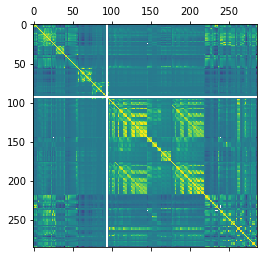

In [13]:
plt.matshow(df_filtered_merged.corr())
plt.show()

Selecting Highly Correlated Features

In [14]:
cor_target = abs(df_filtered_merged.corr()["y"])
relevant_features = cor_target[cor_target<0.3]
relevant_features.shape

(224,)

In [15]:
list_keys = [i for i,j in relevant_features.items()]
final_df=df_filtered_merged.drop(columns=list_keys,axis=1)
print(final_df.shape)

(100000, 62)


In [16]:
temp_df = final_df.isnull().any()==True
null_keys = [ i for i,j in temp_df.items() if j == True]
print(null_keys)

['x002', 'x004', 'x005', 'x041', 'x057', 'x058', 'x148', 'x235', 'x237', 'x239', 'x287']


Filling Null Values with its mean Value

In [17]:
for i in null_keys:
    final_df[i].fillna(final_df[i].mean(),inplace=True)
final_df.shape    

(100000, 62)

In [18]:
y = final_df.y
X = final_df.drop(columns =['y'], axis = 1)

In [19]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)
print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)

(80000, 61) (20000, 61) (80000,) (20000,)


<AxesSubplot:>

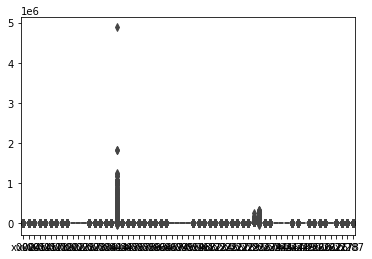

In [20]:
%matplotlib inline
sns.boxplot(data=X_train)

<AxesSubplot:>

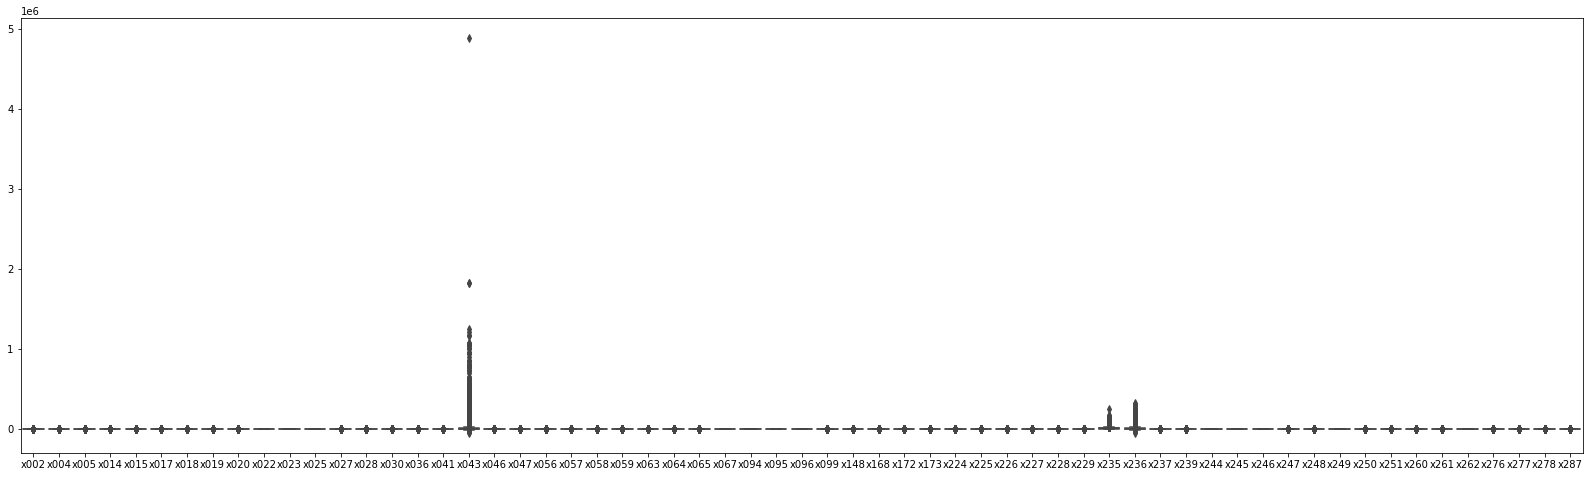

In [21]:
%matplotlib inline
plt.figure(figsize = (28,8))
sns.boxplot(data=X_train)

C:\Users\Dexter\AppData\Local\Temp\ipykernel_5576\42559516.py:10: MatplotlibDeprecationWarning: Passing non-integers as three-element position specification is deprecated since 3.3 and will be removed two minor releases later.
  plt.subplot(nGraphRow, nGraphPerRow, i + 1)


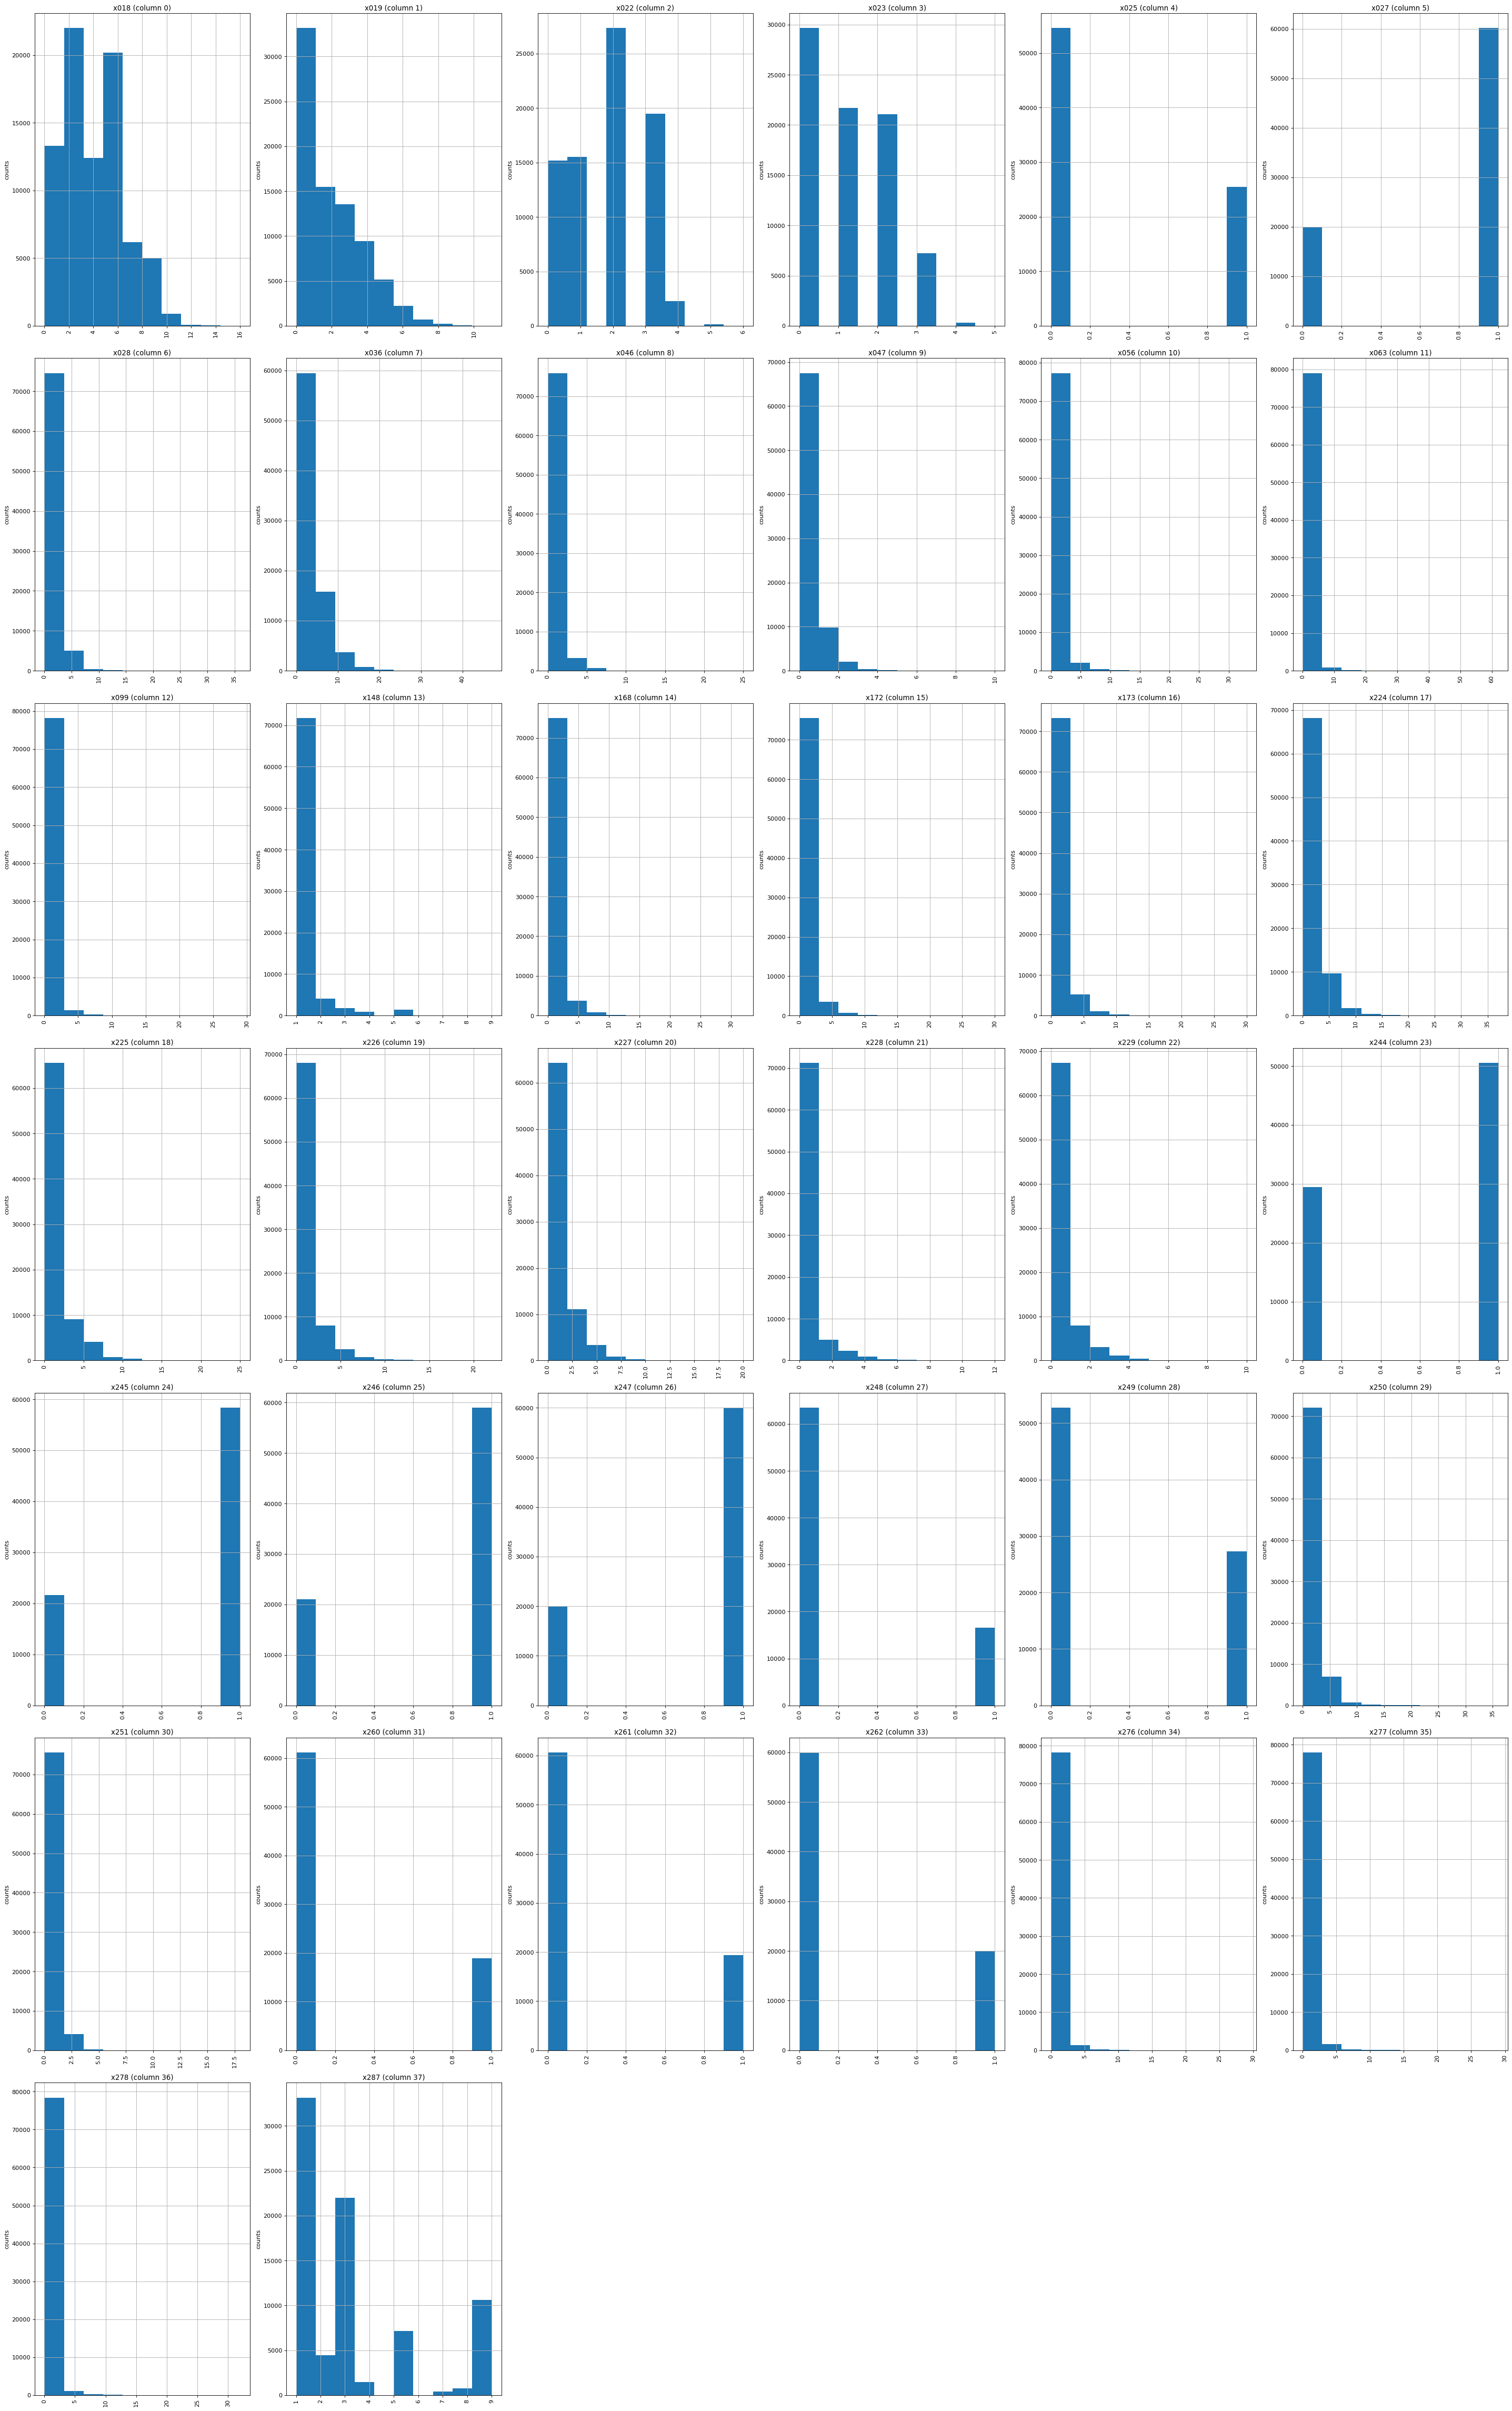

In [22]:

# Distribution graphs (histogram/bar graph) of column data
def plotPerColumnDistribution(df, nGraphShown, nGraphPerRow):
    nunique = df.nunique()
    df = df[[col for col in df if nunique[col] > 1 and nunique[col] < 50]] # For displaying purposes, pick columns that have between 1 and 50 unique values
    nRow, nCol = df.shape
    columnNames = list(df)
    nGraphRow = (nCol + nGraphPerRow - 1) / nGraphPerRow
    plt.figure(num = None, figsize = (6 * nGraphPerRow, 8 * nGraphRow), dpi = 80, facecolor = 'w', edgecolor = 'k')
    for i in range(min(nCol, nGraphShown)):
        plt.subplot(nGraphRow, nGraphPerRow, i + 1)
        columnDf = df.iloc[:, i]
        if (not np.issubdtype(type(columnDf.iloc[0]), np.number)):
            valueCounts = columnDf.value_counts()
            valueCounts.plot.bar()
        else:
            columnDf.hist()
        plt.ylabel('counts')
        plt.xticks(rotation = 90)
        plt.title(f'{columnNames[i]} (column {i})')
    plt.tight_layout(pad = 1.0, w_pad = 1.0, h_pad = 1.0)
    plt.show()

plotPerColumnDistribution(X_train, X_train.shape[1], 6)

In [23]:
from sklearn.preprocessing import StandardScaler, MinMaxScaler
scaler = MinMaxScaler().fit(X)
scaled_X = scaler.transform(X)

### Data Partition

In [24]:
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(scaled_X, y, test_size = 0.2, random_state = 42)

print(X_train.shape)
print(X_test.shape)
print(Y_train.shape)
print(Y_test.shape)

(80000, 61)
(20000, 61)
(80000,)
(20000,)


### Building Model and prediction using Scikit Learn

In [30]:
from sklearn.linear_model import LinearRegression, LogisticRegression
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.metrics import mean_squared_error, mean_absolute_error

k_fold  = KFold(n_splits=10)
results = cross_val_score(LinearRegression(), X_train, Y_train, cv=k_fold, scoring="neg_mean_absolute_error")
print(f"Linear Regression: {round(results.mean(), 3)}, {round(results.std(), 3)}")

Linear Regression: -40.071, 0.235


In [31]:
model = LinearRegression()
model.fit(X_train,Y_train)


LinearRegression()

In [32]:
train_predict = model.predict(X_train)
test_predict = model.predict(X_test)

### Evaluation 

In [33]:
error_percent = np.mean(np.abs((Y_train - train_predict) / Y_train)) * 100
print("MAPE - Mean Absolute Percentage Error (TRAIN DATA): ",error_percent )
Y_train, train_predict = np.array(Y_train), np.array(train_predict)

MAPE - Mean Absolute Percentage Error (TRAIN DATA):  6.892261392013651


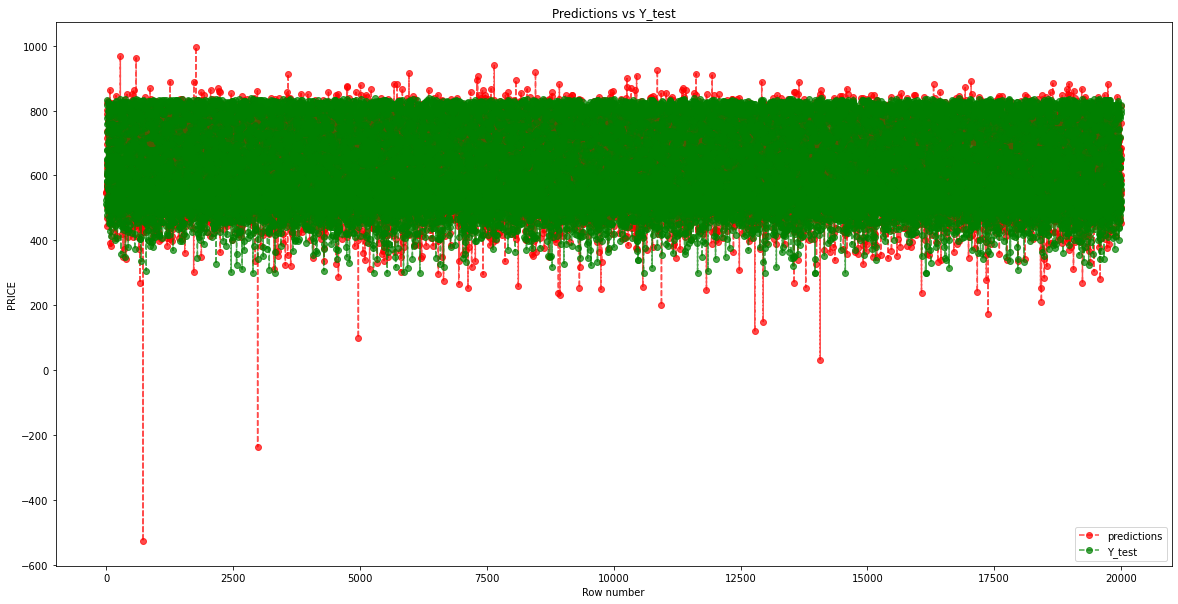

In [34]:
# plot between predictions and Y_test
x_axis = np.array(range(0, test_predict.shape[0]))
plt.figure(figsize=(20,10))
plt.plot(x_axis, test_predict, linestyle="--", marker="o", alpha=0.7, color='r', label="predictions")
plt.plot(x_axis, Y_test, linestyle="--", marker="o", alpha=0.7, color='g', label="Y_test")
plt.xlabel('Row number')
plt.ylabel('PRICE')
plt.title('Predictions vs Y_test')
plt.legend(loc='lower right')

### Part B Logistic Regression 

30938    603
1203     826
41203    688
65934    638
10432    527
        ... 
77907    542
26692    834
518      552
65642    538
58544    578
Name: y, Length: 80000, dtype: int64